# Robotic Systems II (ECE-DK904)

## Electrical and Computer Engineering Department, University of Patras, Greece

**Instructor:** Konstantinos Chatzilygeroudis (costashatz@upatras.gr)

## Lab 2

### Gradients, Jacobians and Hessians

Let's start by computing the gradient and the derivative (Leibniz's notation) of a scalar function with vector-valued inputs. We have this nice quadratic:

$f(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{x}^T\boldsymbol{Q}\boldsymbol{x}$

where $\boldsymbol{x}\in{\mathbb{R}^{3\times 1}}$ (column vector).

Let's begin by writing a Python function, `f()`, that computes the value:

In [ ]:
# Imports
import numpy as np # Linear Algebra
import scipy # For matrix exponential
import matplotlib.pyplot as plt # Plotting

In [ ]:
Q = np.diag([0.1, 0.5, 1.]) # Global var for ease of use

def f(x):
    ### TO-DO: Write the function! It should return a scalar!
    return 1/2 * (x.T @ Q @ x)

The gradient of $f$ is denoted as $\nabla_{\boldsymbol{x}}f\in\mathbb{R}^{3\times 1}$ (column vector). Let's write a function in Python, `gradf()`, that computes this:

In [ ]:
def gradf(x):
    ### TO-DO: Write the gradient of f
    return 1/2 * (Q + Q.T) @ x

On the other hand, the derivative of $f$ is denoted as $\frac{\partial f}{\partial\boldsymbol{x}}\in\mathbb{R}^{1\times 3}$ (row vector). Let's write a function in Python, `df()`, that computes this:

In [ ]:
def df(x):
    ### TO-DO: Write the derivative of f
    return 1/2 * x.T @ (Q + Q.T)

Are the two functions computing the same thing!? Let's find out:

In [ ]:
x0 = np.array([[-2., 1., 4.]]).T

gf = gradf(x0)
dfdx = df(x0)

print(gf)
print(dfdx)

What is the difference!? Basically, $\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_0) = \frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}=\boldsymbol{x}_0}^T$. Let's verify this!

In [ ]:
print(np.linalg.norm(gf-dfdx.T))

Now let's compute the Hessian of `f()` compactly:

In [ ]:
def hessf(x):
    ### TO-DO: Write the Hessian of f
    return 1/2 * (Q + Q.T)

Now let's create a vector-valued function $f(\cdot):\mathbb{R}^N\to\mathbb{R}^M$. Let's do the **uncontrolled** pendulum:

In [ ]:
def pendulum(x, l = 1., g = 9.81):
    theta_ddot = (-g/l)*np.sin(x[:1])

    return np.concatenate([x[1:], theta_ddot], axis=0)

Let's write the Jacobian of this. But first, let's remind ourselves what the Jacobian is:

For $\boldsymbol{y} = f(\boldsymbol{x}) : \mathbb{R}^N\to\mathbb{R}^M$, we have:

$\frac{\partial f}{\partial\boldsymbol{x}} = \begin{bmatrix}\frac{\partial\boldsymbol{y}_1}{\partial\boldsymbol{x}_1} & \frac{\partial\boldsymbol{y}_1}{\partial\boldsymbol{x}_2} & \dots & \frac{\partial\boldsymbol{y}_1}{\partial\boldsymbol{x}_N}\\\frac{\partial\boldsymbol{y}_2}{\partial\boldsymbol{x}_1} & \frac{\partial\boldsymbol{y}_2}{\partial\boldsymbol{x}_2} & \dots & \frac{\partial\boldsymbol{y}_2}{\partial\boldsymbol{x}_N}\\\ddots & \ddots & \ddots & \ddots\\\frac{\partial\boldsymbol{y}_M}{\partial\boldsymbol{x}_1} & \frac{\partial\boldsymbol{y}_M}{\partial\boldsymbol{x}_2} & \dots & \frac{\partial\boldsymbol{y}_M}{\partial\boldsymbol{x}_N}\end{bmatrix}\in\mathbb{R}^{M\times N}$

In [ ]:
def deriv_pendulum(x, l = 1., g = 9.81):
    ### TO-DO: Write the Jacobian of `pendulum()`
    dx = np.block([[0., 1.], [(-g/l)*np.cos(x[:1]), 0.]])
    ### END of TO-DO
    return dx

In [ ]:
# Let's test it
x0 = np.array([[0.1, 0.]]).T

print(deriv_pendulum(x0)) # you should see [[ 0.          1.        ], [-9.76099086  0.        ]]

Computing derivatives and Jacobians of complicated functions can be tedious and error prone!

### Automatic Differentiation

Recently, very powerful tools has been developed. Tools that can **automatically** compute the gradients of equations! There are two main different ways of doing this:

- **Forward mode:** In forward mode, each function evaluation produces not only its output value but also its derivative.
- **Reverse mode:** In reverse mode, each function evaluation produces a complete expression tree that contains the sequence of all mathematical operations between the input variables to produce the output variable.

For our purposes, **forward mode** should be preferable since we have a low number of input/output variables for each function.

**Automatic Differentiation in Python**: we are going to use the [jax](https://jax.readthedocs.io/en/latest/) library.

Let's see how to do the above with *jax*:

In [ ]:
# First import the library
# JAX - Linear Algebra with automatic differentiation
import jax.numpy as jnp
from jax import jacfwd, jit

In [ ]:
# Automatic Differentiation
df = jit(jacfwd(f, 0)) # 0 means wrt to the fist argument!

**And that's all!** Let's use it:

In [ ]:
x0 = np.array([[-2., 1., 4.]]).T

print(df(x0))

What is this?! Let's have a closer look at the output. Let's print the *shape* (dimensions) of the outcome:

In [ ]:
v = df(x0)

### TO-DO: Print dimensions of `v`
print(v.shape)
### END of TO-DO

It should be `1x3` (this is the derivative, not the gradient!) but it's `3x1`! This is because jax assumes that a vector input should be of size `(n,)`. Let's fix this to get what we want:

In [ ]:
# Wrap input shape to Jacobian calls in order to output correct shape
# Remember that we want to compute the derivative df/dx and not the gradient (df/dx).T
df_dx = lambda x : df(x.reshape((3,))).reshape((1,3))

print(df_dx(x0))

Now we can take automatically all the derivatives. Let's take the second derivative:

In [ ]:
### TO-DO: Write the second derivative as a function `ddf_ddx()`
ddf = jit(jacfwd(df, 0))
ddf_ddx = lambda x : ddf(x.reshape((3,)))
### END OF TO-DO

print(ddf_ddx(x0))

Pretty cool! We can take the auto-derivative of a function that computes another auto-derivative!!

### Newton's Method

Let's remember the Newton's method for **root finding**:

1) We first linearize around the current estimate $\boldsymbol{x}_k$:

$f(\boldsymbol{x}_k + \Delta\boldsymbol{x})\approx f(\boldsymbol{x}_k) + \frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Delta\boldsymbol{x}$

2) We then set $f(\boldsymbol{x}_k + \Delta\boldsymbol{x}) = 0$ and solve for $\Delta\boldsymbol{x}$:

$f(\boldsymbol{x}_k) + \frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Delta\boldsymbol{x} = 0$

$\Delta\boldsymbol{x} = -\Big(\frac{\partial f}{\partial\boldsymbol{x}}\Big|_{\boldsymbol{x}_k}\Big)^{-1}f(\boldsymbol{x}_k)$

3) We apply the correction $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \Delta\boldsymbol{x}$

4) Repeat until convergence

Let's try the newton method on our `pendulum()`!

In [ ]:
# Initial guess
x0 = np.array([[0.5, 0.]]).T

# Step for newton (we start at a big one to enable the while loop)
dx = np.ones((2,1))

# iterate
x = np.copy(x0)
iters = 0
while np.linalg.norm(dx) > 1e-6:
    ### TO-DO: Write Newton's method step for Root Finding
    dx = - np.linalg.inv(deriv_pendulum(x)) @ pendulum(x)
    x = x + dx
    ### END of TO-DO
    iters += 1

print("Found x:", x.T, "->", pendulum(x).T, "in", iters, "iterations!")

### Newton's Method for Optimization

Let's optimize `f()`! How can we do that with Newton's Method? We frame the optimization problem as a root finding problem at the gradient of $f$! Let's remember the procedure:

$\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k + \Delta\boldsymbol{x}) \approx \nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k) + \frac{\partial}{\partial\boldsymbol{x}}\Big(\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)\Big)\Delta\boldsymbol{x} = 0$

$\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k + \Delta\boldsymbol{x}) \approx \nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k) + \nabla^2_{\boldsymbol{x}}f(\boldsymbol{x}_k)\Delta\boldsymbol{x} = 0$

$\Delta\boldsymbol{x} = -\Big(\nabla^2_{\boldsymbol{x}}f(\boldsymbol{x}_k)\Big)^{-1}\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)$

$\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \Delta\boldsymbol{x}$

Cool! Let's do this on `f()`:

In [ ]:
# Initial point
x0 = np.array([[-2., 1., 4.]]).T

# Step for newton (we start at a big one to enable the while loop)
dx = np.ones((3,1))

# iterate
x = np.copy(x0)
iters = 0
while np.linalg.norm(dx) > 1e-6:
    ### TO-DO: Write Newton's method step for Optimization
    dx = - np.linalg.inv(hessf(x)) @ gradf(x)
    x = x + dx
    ### END of TO-DO
    iters += 1

print("Found x:", x.T, "->", f(x), "in", iters, "iterations!")

Wow! This was fast convergence! Only **2** iterations! Try putting the initial point far away! In convex functions (like our function), Newton's method has **quadratic convergence rate**: this basically means **blazingly fast!!** Notice also that we used the autodiff gradients/Hessian from *jax*!

### Practical Newton's Method (with tricks)

In practice, Newton's method can *maximize* instead of minimizing and also overshoot the local minimum, oscillate or even explode! Let's start optimizing a harder function and see how we can address those issues of Newton's method.

Let's try to optimize the [Rastrigin Function](https://www.sfu.ca/~ssurjano/rastr.html) in 2D. Let's plot it to see how it looks:

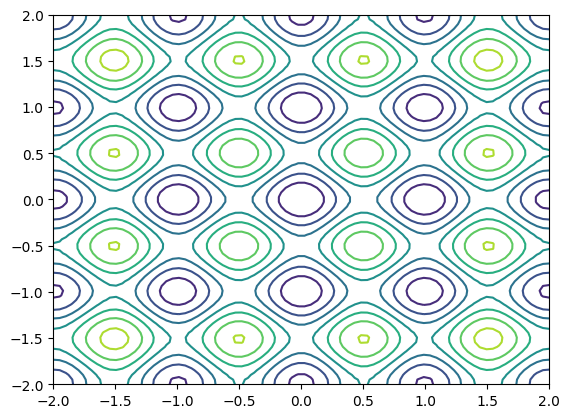

In [80]:
def f(x):
    A = 10.
    d = x.shape[0]
    return A * d + jnp.sum(x.T @ x) - A * jnp.sum(jnp.cos(2. * jnp.pi * x))

plt.close()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

N = 80
x1 = np.linspace(-2., 2., N)
x2 = np.linspace(-2., 2., N)

X, Y = np.meshgrid(x1, x2)

val = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        xx = np.zeros((2, 1))
        xx[0] = X[i, j]
        xx[1] = Y[i, j]
        val[i, j] = f(xx)

CS = ax.contour(x1.reshape((N,)), x2.reshape((N,)), val)

Nice function with many many local minima! Let's use Newton's method on this!

Initial value: 14.580171


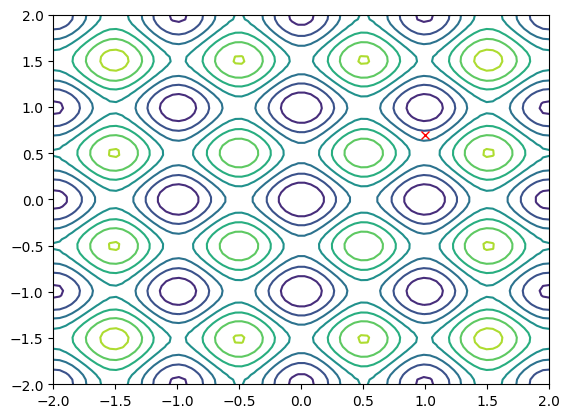

In [81]:
# First let's autodiff it!
### TO-DO: Write jax autodiff (we need first and second order derivatives)
df = jit(jacfwd(f, 0))
df_dx = lambda x : df(x.reshape((2,))).reshape((1,2))

ddf = jit(jacfwd(df, 0))
ddf_ddx = lambda x : ddf(x.reshape((2,)))
### END of TO-DO

# Initial point
x0 = np.array([[1., 0.7]]).T
# x0 = np.array([[1., 1.25]]).T # Uncomment and watch it explode!

ax.plot(x0[0, 0], x0[1, 0], 'rx')

print("Initial value:", f(x0))

x = np.copy(x0)

fig # show figure again with updated point(s)

x: [[1.  0.7]] -> 14.580171


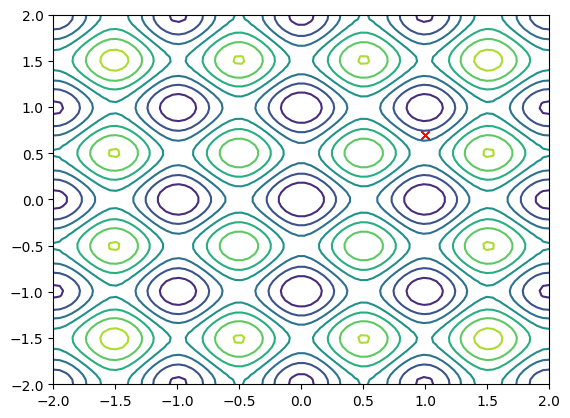

In [84]:
# iterate
### TO-DO: Write Newton's method step for Optimization
iters = 0
while np.linalg.norm(dx) > 1e-6:
    dx = - np.linalg.inv(ddf_ddx(x)) @ df_dx(x)
    x = x + dx
    iters += 1
### END of TO-DO
print("x:", x.T, "->", f(x))

ax.plot(x[0, 0], x[1, 0], 'rx')

fig # show figure again with updated point(s)

We find a local maximum! **AND** we can easily explode! Let's fix that with **damping** and **Line search**. Let's remind ourselves of the damping procedure (this helps to always minimize and regularize the optimizer):

$\boldsymbol{H} = \nabla^2_{\boldsymbol{x}}f(\boldsymbol{x}_k)$

$\text{while } \boldsymbol{H}\preceq 0:$

$\quad\boldsymbol{H} = \boldsymbol{H} + \beta\boldsymbol{I}$

$\Delta\boldsymbol{x} = -\boldsymbol{H}^{-1}\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)$

$\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \Delta\boldsymbol{x}$

Let's create a function that does the **damped Netwon's iterate** (aka one step):

In [85]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def damped_newton_step(x, beta = 100.):
    ### TO-DO: Implement Damped Newton step
    H = ddf_ddx(x)
    while(not is_pos_def(H)):
        H = H + beta * np.eye(2)
    dx = - np.linalg.inv(H) @ df_dx(x).T
    ### END of TO-DO
    return x + dx

Let's optimize the Rastrigin function with our new function:

Initial value: 14.580171


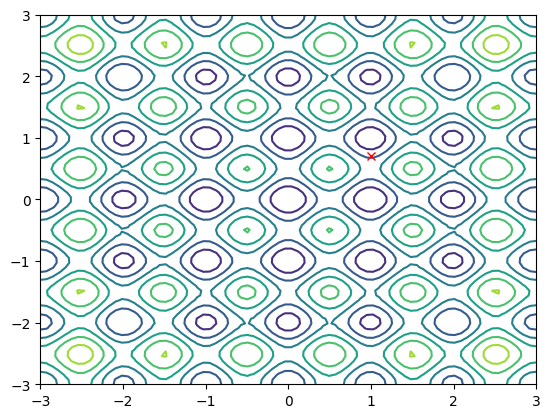

In [86]:
# Plot the function!
plt.close()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

N = 80
x1 = np.linspace(-3., 3., N)
x2 = np.linspace(-3., 3., N)

X, Y = np.meshgrid(x1, x2)

val = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        xx = np.zeros((2, 1))
        xx[0] = X[i, j]
        xx[1] = Y[i, j]
        val[i, j] = f(xx)

CS = ax.contour(x1.reshape((N,)), x2.reshape((N,)), val)

# Initial point
x0 = np.array([[1., 0.7]]).T
# x0 = np.array([[1., 1.25]]).T # Uncomment and watch it explode!

ax.plot(x0[0, 0], x0[1, 0], 'rx')

print("Initial value:", f(x0))

x = np.copy(x0)

x: [[0.99664867 1.4294128 ]] -> 22.071249


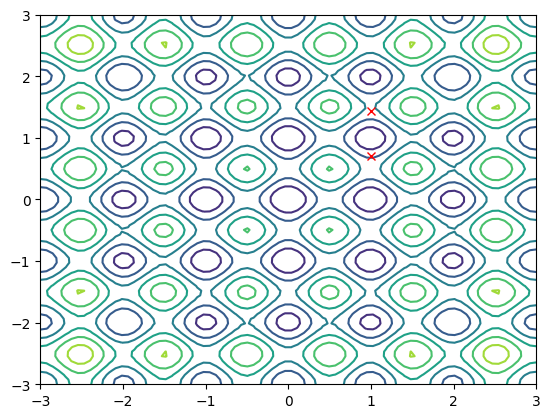

In [60]:
# iterate
x = damped_newton_step(x)

print("x:", x.T, "->", f(x))

ax.plot(x[0, 0], x[1, 0], 'rx')

fig # show figure again with updated point(s)

We are still overshooting and we can explode! We need **line search**! Let's remember the Armijo rule:

$\alpha = 1$

$\text{while } f(\boldsymbol{x}_k + \alpha\Delta\boldsymbol{x}) > f(\boldsymbol{x}_k) + b\alpha\nabla_{\boldsymbol{x}}f(\boldsymbol{x}_k)^T\Delta\boldsymbol{x}:$

$\quad\alpha = c\alpha$

$\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \alpha\Delta\boldsymbol{x}$

where $0<c<1$ and $b$ is something small.

This procedure helps us to not blow up to infinity and always improve or stay still. The Armijo rule gives us guarantees that we will always reach a local minimum.

Let's create a function that performs a Newton with both regularization and line search:

In [61]:
def armijo_newton_step(x, beta = 1., b = 0.1, c = 0.5):
    ### TO-DO: Implement Damped + Armijo Newton step
    dx = damped_newton_step(x, beta) - x
    a = 1.
    while(f(x + a * dx) > f(x) + b * a * df_dx(x) @ dx):
        a = c * a
    ### END of TO-DO
    return x + a * dx

Initial value: 14.580171


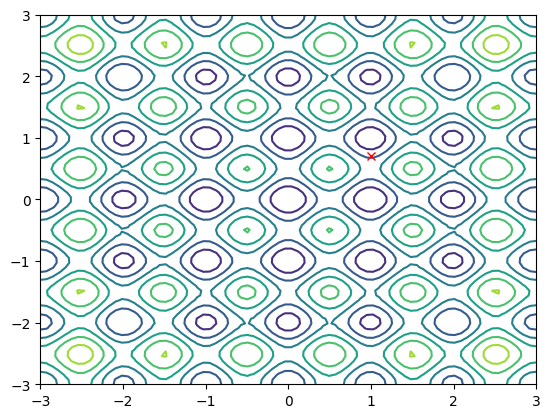

In [62]:
# Let's Optimize!
# Plot the function!
plt.close()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

N = 80
x1 = np.linspace(-3., 3., N)
x2 = np.linspace(-3., 3., N)

X, Y = np.meshgrid(x1, x2)

val = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        xx = np.zeros((2, 1))
        xx[0] = X[i, j]
        xx[1] = Y[i, j]
        val[i, j] = f(xx)

CS = ax.contour(x1.reshape((N,)), x2.reshape((N,)), val)

# Initial point
x0 = np.array([[1., 0.7]]).T
# x0 = np.array([[1., 1.25]]).T # It was failing with Damped alone! Now it finds the closest local minima!

ax.plot(x0[0, 0], x0[1, 0], 'rx')

print("Initial value:", f(x0))

x = np.copy(x0)

x: [[0.9999999 1.0602262]] -> 2.8315544


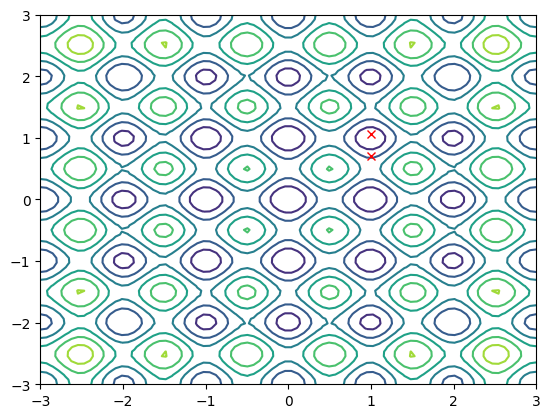

In [63]:
# iterate
x = armijo_newton_step(x)

print("x:", x.T, "->", f(x))

ax.plot(x[0, 0], x[1, 0], 'rx')

fig # show figure again with updated point(s)